# Titanic project
### The 'Hello World' in the world of machine learning...

#### References:
- https://kaggle-kr.tistory.com/17?category=868316
- https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook
- https://github.com/PinkWink/playing_data/blob/70076779f40c827f3c93d5d46501a1e9ef396572/7.%20Titanic.ipynb#L4

### This is a direct copy from Kaggle Notebook. To run this from a local notebook, it would require Kaggle API to access the data.

In [212]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')  # set matplotlib style to 'seaborn'
sns.set(font_scale=2.5)   # fix font size for seaborn
import plotly.express as px

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [213]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [214]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [215]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [216]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1. Check data

#### 1.1 Check null data

In [217]:
# loop to compute null ratio in each column (train)

for col in df_train.columns:
    
    # Calculate the number of NaN (missing) values in the current column
    null_count = df_train[col].isnull().sum()
    
    # Get row length of current column
    col_len = df_train[col].shape[0]
    
    # Calculate percentage of NaN values (2 d.p.)
    nan_percent = round(null_count / col_len * 100, 2)
    
    # Print output message
    message = '{:>10}\t NaN value percentage: {:.2f}% ({} / {})' .format(col, nan_percent, (col_len - null_count), col_len)
    print(message)

PassengerId	 NaN value percentage: 0.00% (891 / 891)
  Survived	 NaN value percentage: 0.00% (891 / 891)
    Pclass	 NaN value percentage: 0.00% (891 / 891)
      Name	 NaN value percentage: 0.00% (891 / 891)
       Sex	 NaN value percentage: 0.00% (891 / 891)
       Age	 NaN value percentage: 19.87% (714 / 891)
     SibSp	 NaN value percentage: 0.00% (891 / 891)
     Parch	 NaN value percentage: 0.00% (891 / 891)
    Ticket	 NaN value percentage: 0.00% (891 / 891)
      Fare	 NaN value percentage: 0.00% (891 / 891)
     Cabin	 NaN value percentage: 77.10% (204 / 891)
  Embarked	 NaN value percentage: 0.22% (889 / 891)


In [218]:
# loop to compute null ratio in each column (train)

for col in df_test.columns:
    
    # Calculate the number of NaN (missing) values in the current column
    null_count = df_test[col].isnull().sum()
    
    # Get row length of current column
    col_len = df_test[col].shape[0]
    
    # Calculate percentage of NaN values (2 d.p.)
    nan_percent = round(null_count / col_len * 100, 2)
    
    # Print output message
    message = '{:>10}\t NaN value percentage: {:.2f}% ({} / {})' .format(col, nan_percent, (col_len - null_count), col_len)
    print(message)

PassengerId	 NaN value percentage: 0.00% (418 / 418)
    Pclass	 NaN value percentage: 0.00% (418 / 418)
      Name	 NaN value percentage: 0.00% (418 / 418)
       Sex	 NaN value percentage: 0.00% (418 / 418)
       Age	 NaN value percentage: 20.57% (332 / 418)
     SibSp	 NaN value percentage: 0.00% (418 / 418)
     Parch	 NaN value percentage: 0.00% (418 / 418)
    Ticket	 NaN value percentage: 0.00% (418 / 418)
      Fare	 NaN value percentage: 0.24% (417 / 418)
     Cabin	 NaN value percentage: 78.23% (91 / 418)
  Embarked	 NaN value percentage: 0.00% (418 / 418)


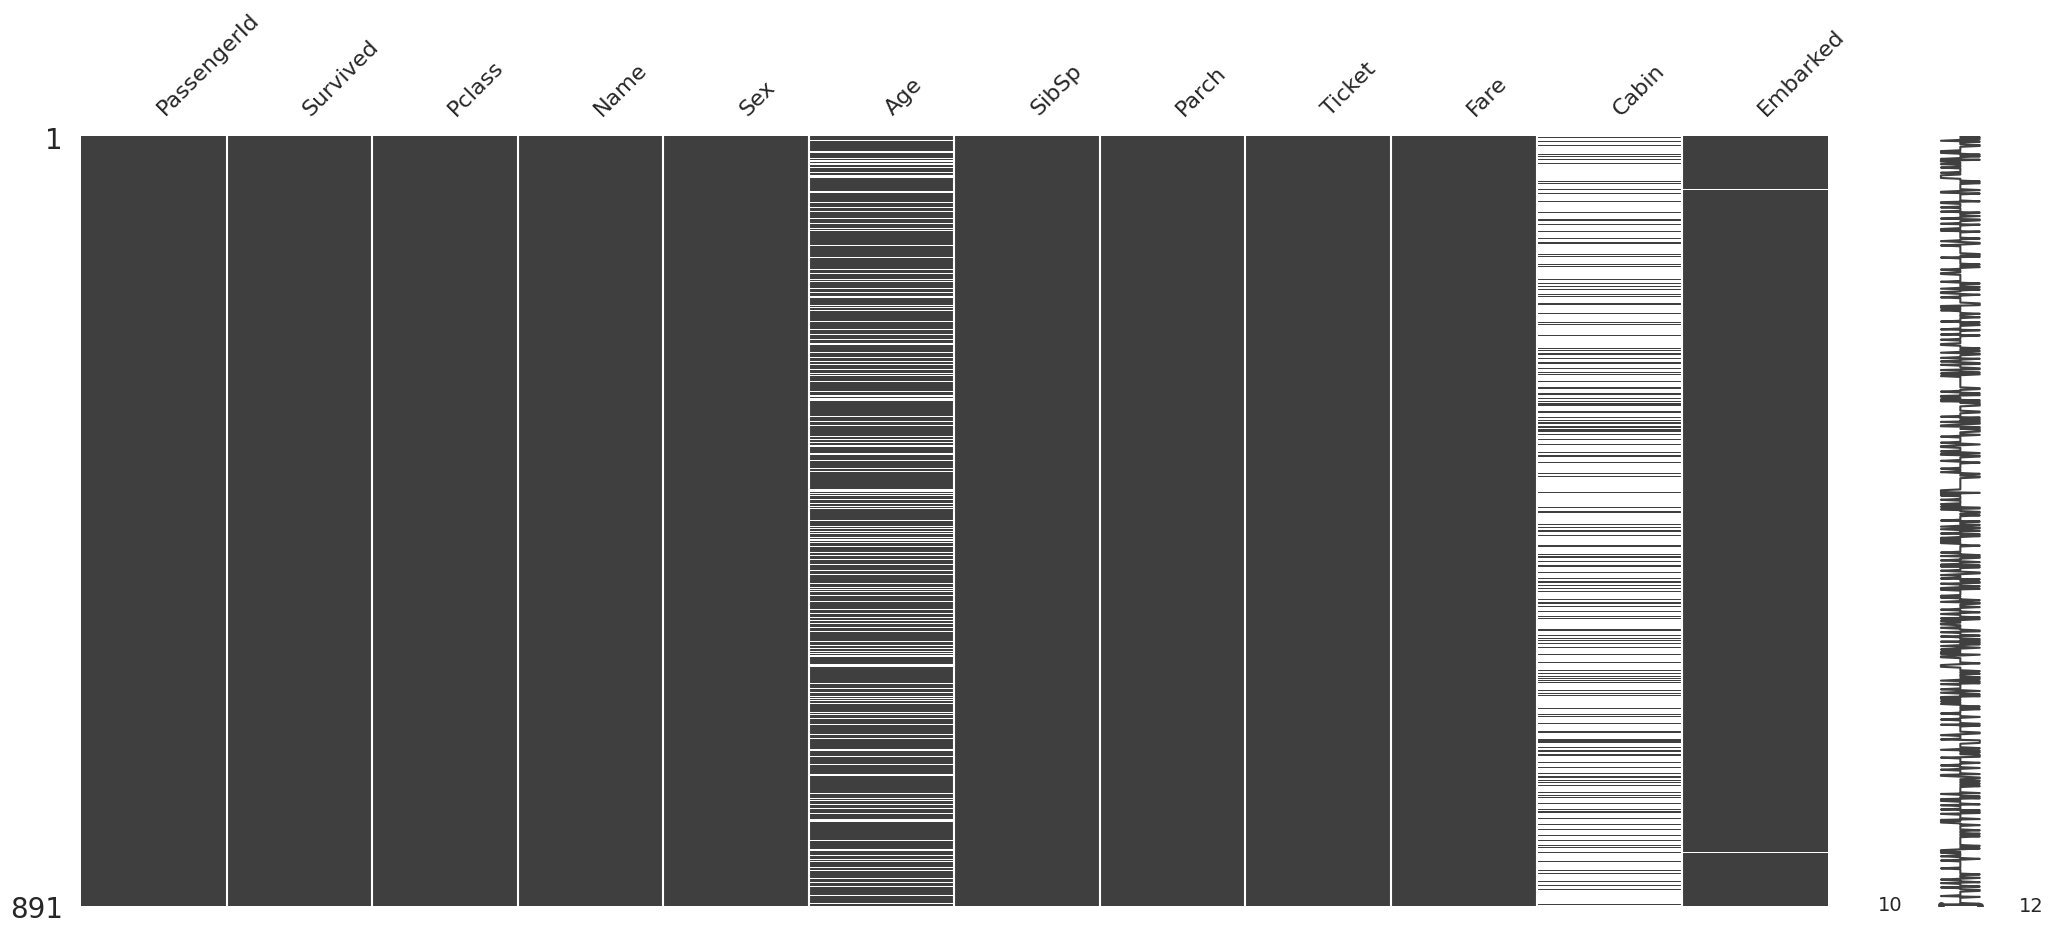

In [219]:
msno.matrix(df_train);

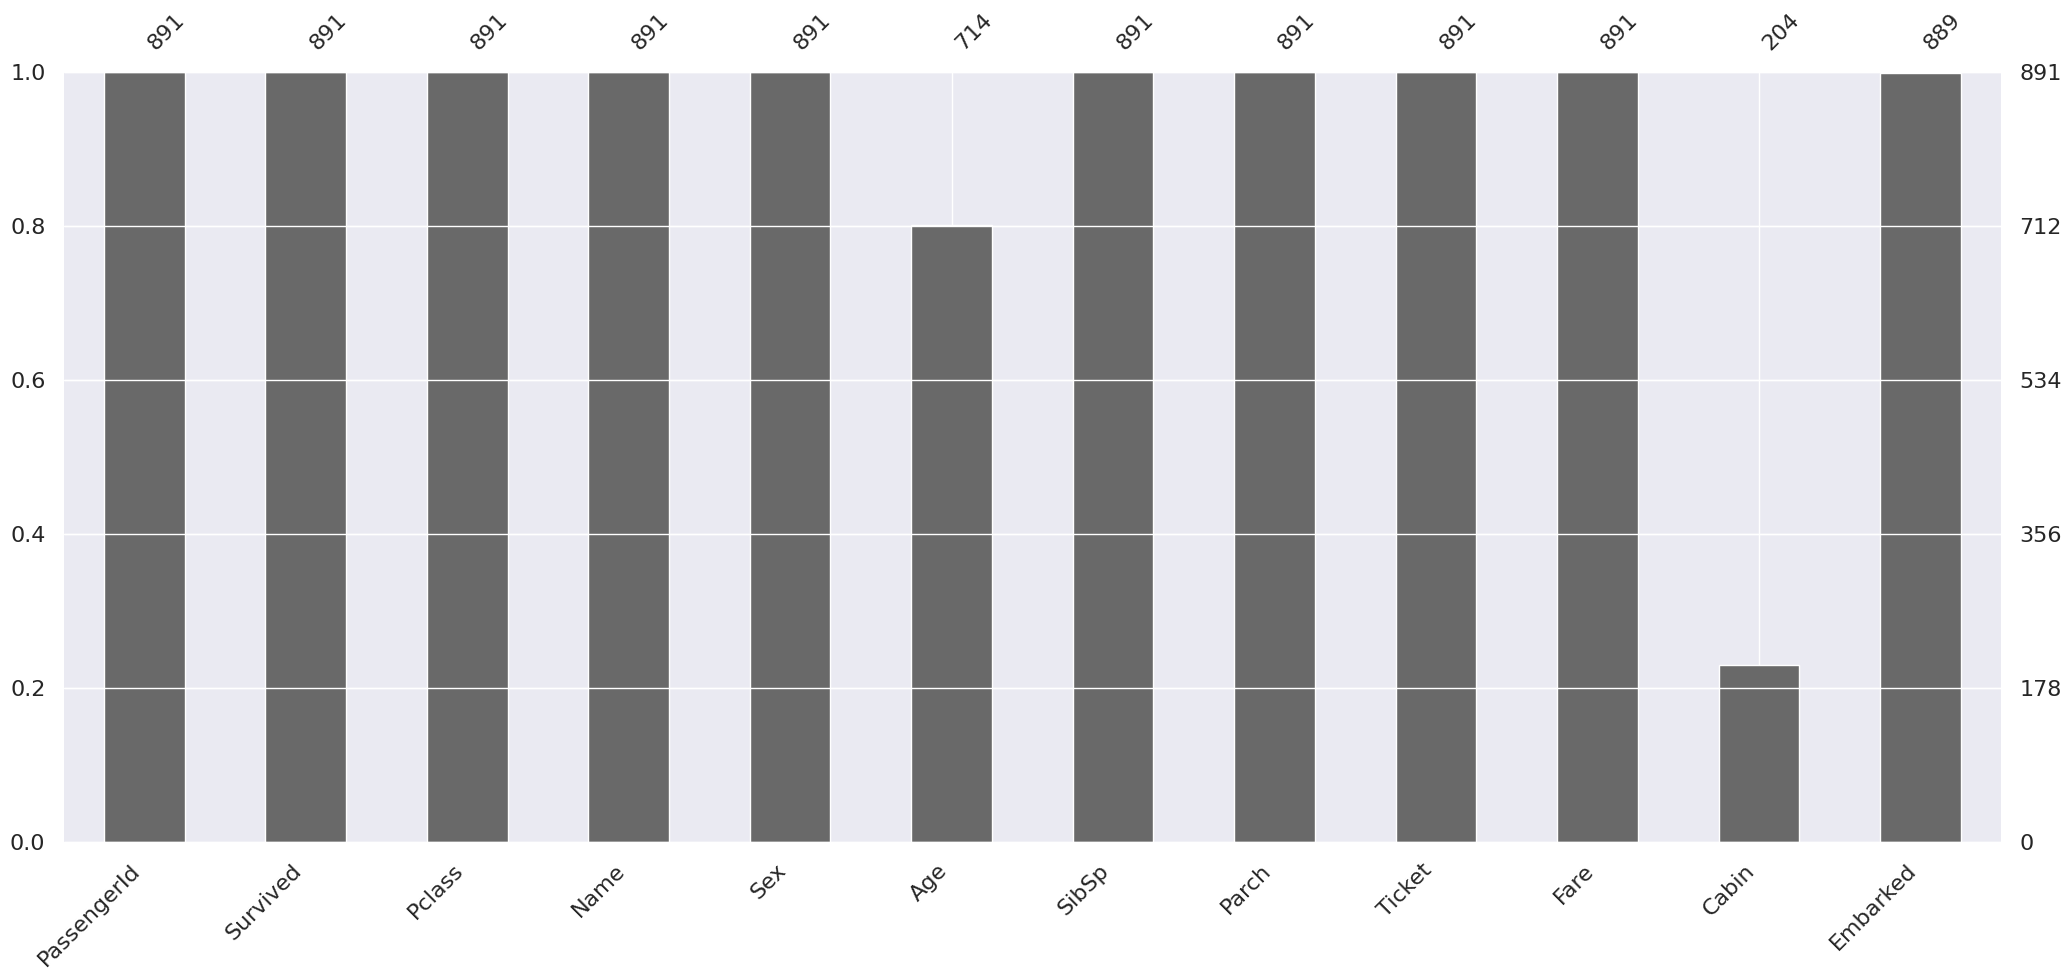

In [220]:
msno.bar(df_train);

#### 1.2. check distribution of target label
- the distribution of the target label in binary classification has a direct impact on how you train, evaluate, and interpret your model. 
- It's crucial to choose evaluation metrics that are sensitive to the specific problem's goals and consider techniques to handle imbalanced datasets when necessary.

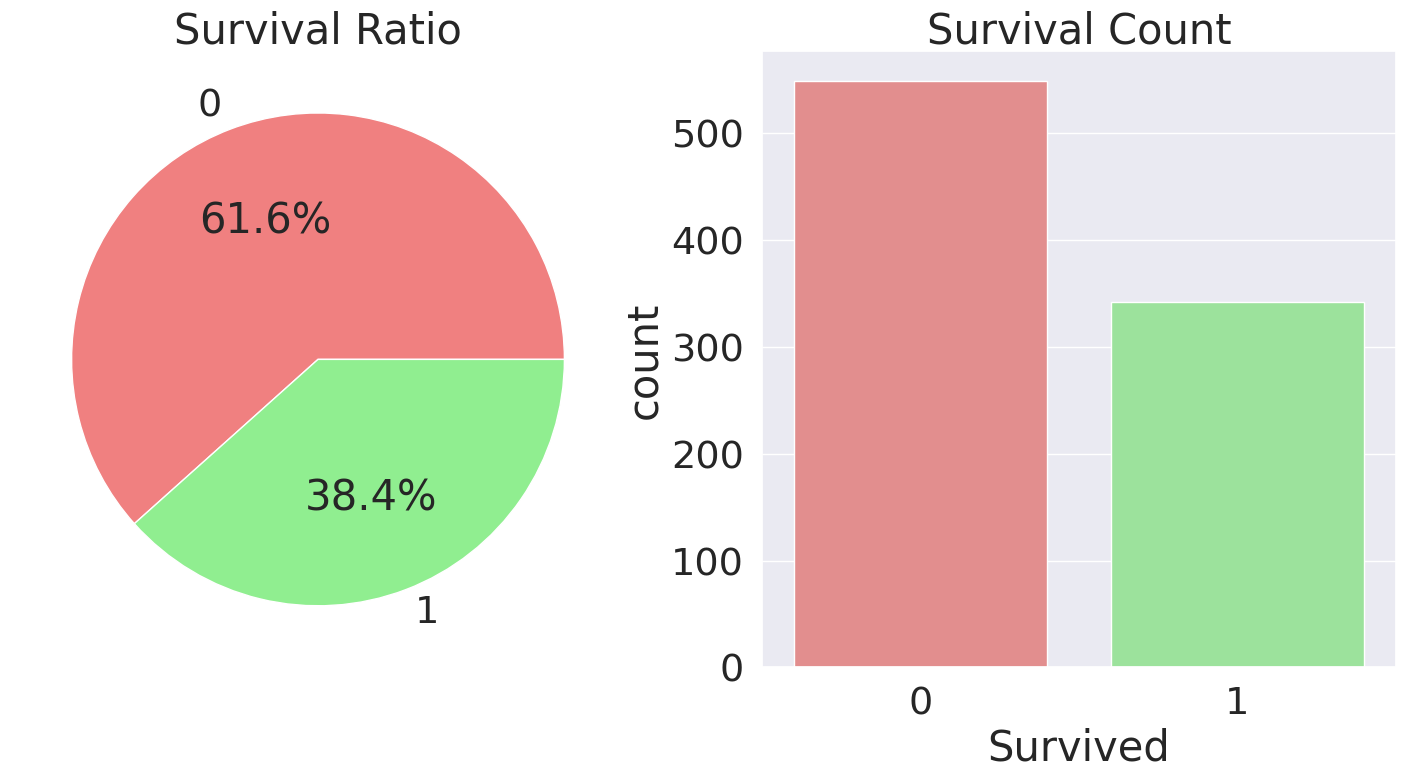

In [221]:
survivor_count = df_train['Survived'].value_counts()
survived_labels = ['Deceased', 'Survivor']

fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # 여러개 플롯 그릴 때 subplot 활용
col = ['lightcoral', 'lightgreen']

survivor_count.plot.pie(autopct='%1.1f%%', ax=axs[0], colors=col)
axs[0].set_title('Survival Ratio')
axs[0].set_ylabel('')
sns.countplot(x = 'Survived', data=df_train, ax=axs[1], palette=col)
axs[1].set_title('Survival Count')

plt.show()


### 2. Exploratory data analysis


In [222]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2.1. Passenger class (Pclass)

In [223]:
# How many people for each class?
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # counts both 0 and 1.

,Survived
Pclass,
1,216
2,184
3,491


In [224]:
# How many survivers from each class?
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum() # counts 1 (=survivors)

,Survived
Pclass,
1,136
2,87
3,119


we can use cross tab to better illustrate this:

In [225]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Using groupby & mean, we could get the ratio of survival.

In [226]:
# mean = survivor rate = count('Survived') / count('All')
class_survival_rate = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()
class_survival_rate

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Let's plot this:

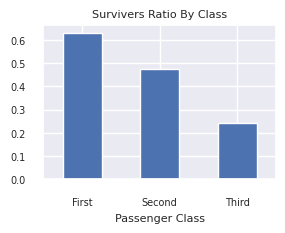

In [227]:
# create bar plot
class_rate_bar = class_survival_rate.plot.bar(legend=False, figsize=(3, 2))

# add title
class_rate_bar.set_title("Survivers Ratio By Class", fontsize=8);

# change x-label
new_labels = ['First', 'Second', 'Third'] 
class_rate_bar.set_xticklabels(new_labels, rotation=0)

# adjust label fontsize
class_rate_bar.set_xlabel("Passenger Class", fontsize=8)

# adjust fontsize
class_rate_bar.tick_params(axis='both', labelsize=7)

The above trend shows that higher class passengers had a better chance at survival.

Let's also take into account that passenger count was greatest in third class.

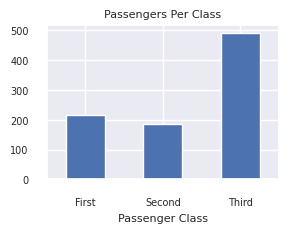

In [228]:
# plot 
pass_per_class = df_train[['Pclass']].value_counts().sort_index().plot.bar(figsize=(3, 2))

# add title
pass_per_class.set_title("Passengers Per Class", fontsize=8);

# Modify x-axis labels
new_labels = ['First', 'Second', 'Third']  # Replace with your desired labels
pass_per_class.set_xticklabels(new_labels, rotation=0)

# adjust label fontsize
pass_per_class.set_xlabel("Passenger Class", fontsize=8)

# adjust fontsize
pass_per_class.tick_params(axis='both', labelsize=7)

(Let's try using subplot to plot the above two graphs adjacently.)

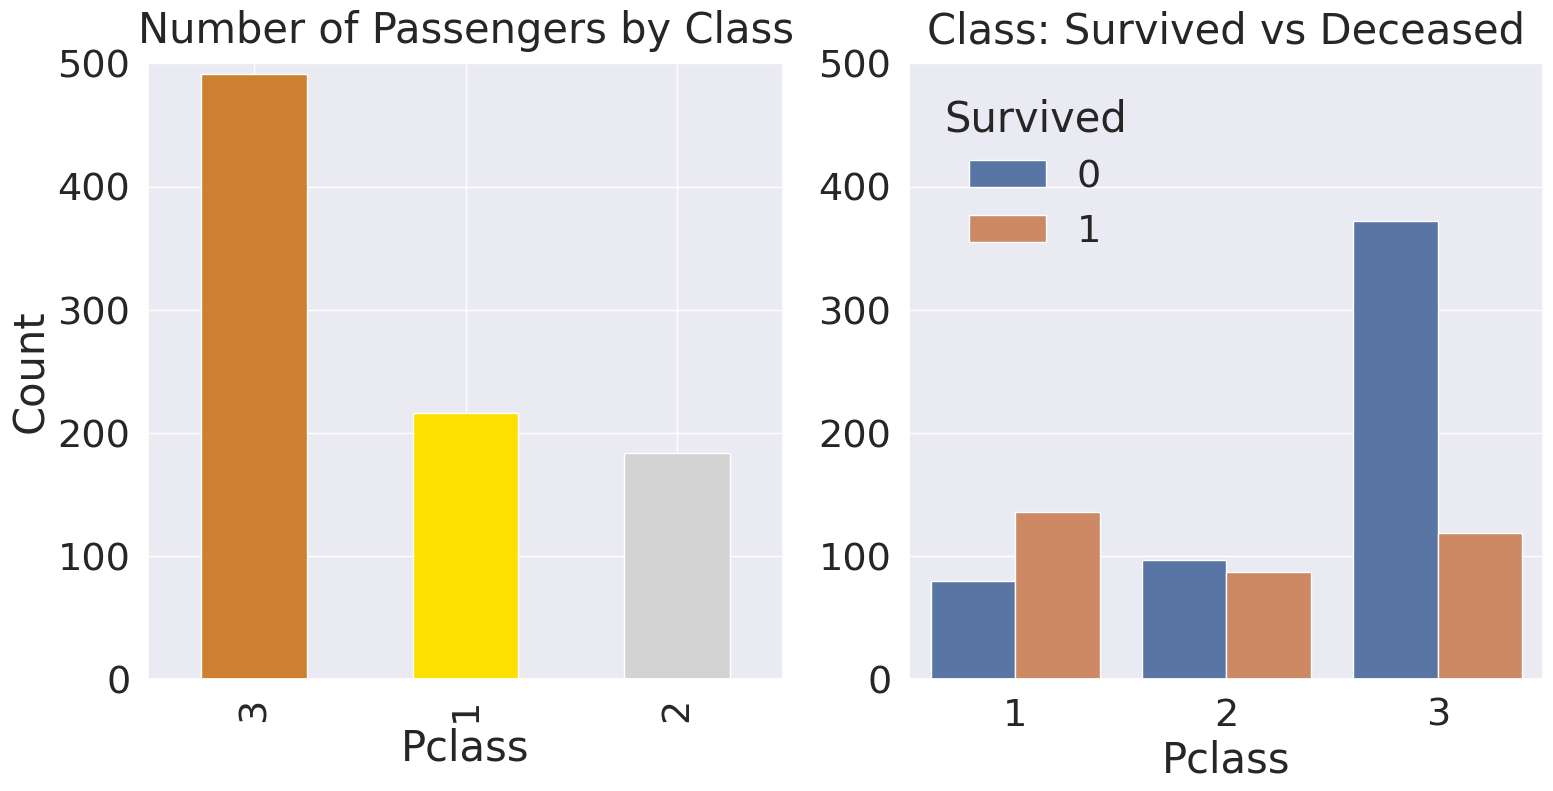

In [229]:
y_position = 1.02
f, axs = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=axs[0])
axs[0].set_title('Number of Passengers by Class', y=y_position)
axs[0].set_ylim(0, 500)
axs[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=axs[1])
axs[1].set_title('Class: Survived vs Deceased', y=y_position)
axs[1].set_ylim(0, 500)  # match y range with plot on the left
axs[1].set_ylabel('')

plt.show()


#### 2.2. Sex

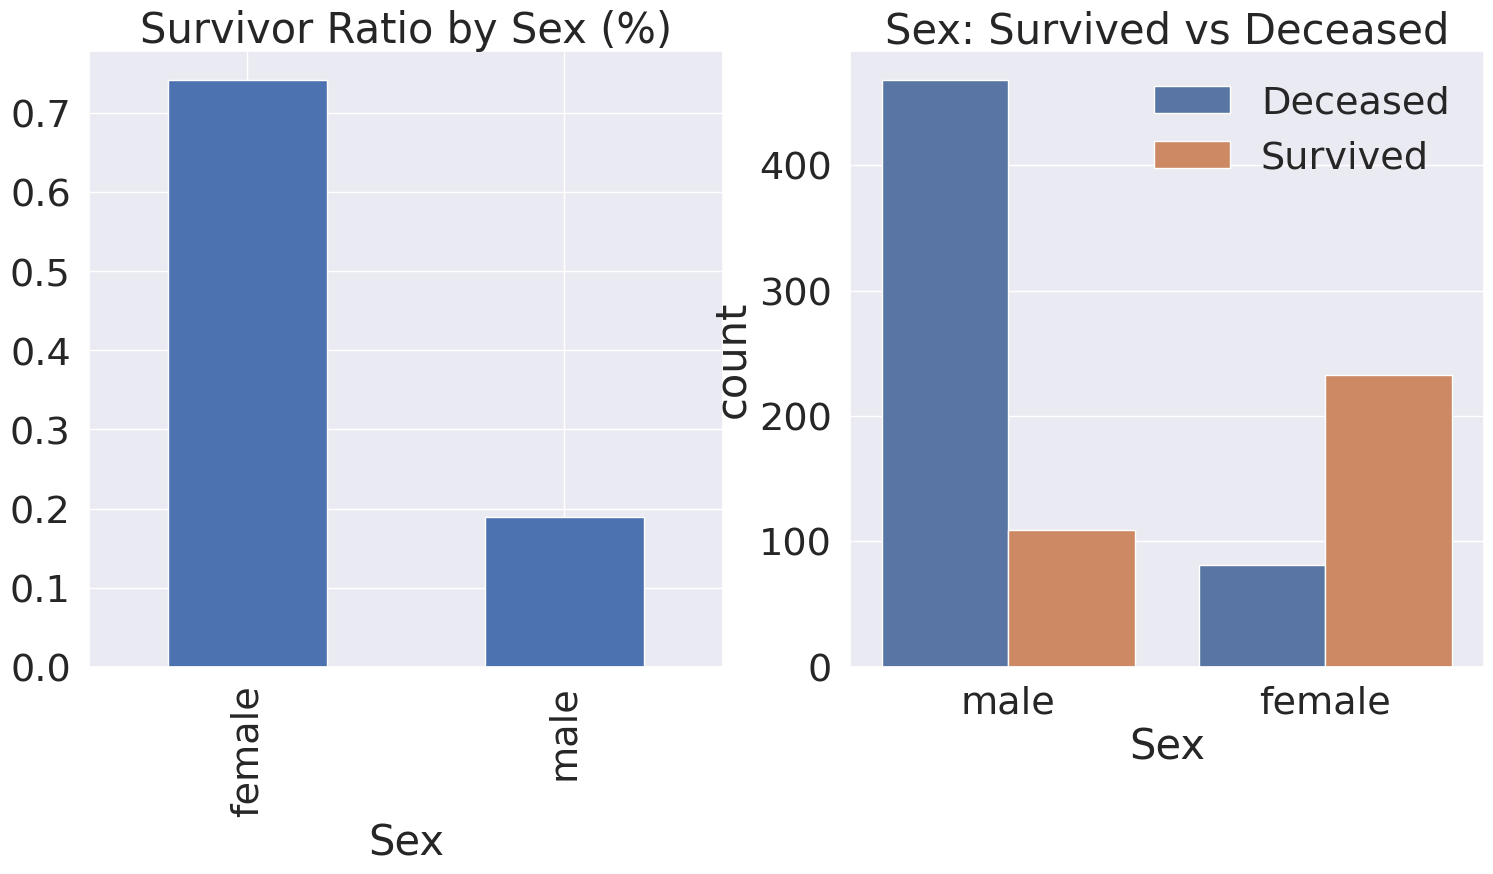

In [230]:
# palette
f, axs = plt.subplots(1, 2, figsize=(18, 8))

# plot 1
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=axs[0])
axs[0].legend(labels=[])  # remove legend
axs[0].set_title('Survivor Ratio by Sex (%)')

# plot 2
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=axs[1])
axs[1].set_title('Sex: Survived vs Deceased')
axs[1].legend(labels=['Deceased', 'Survived'])

plt.show()


Data shows that despite more men were on board, survival rate for women was greater.

In [231]:
df_train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [232]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Based on the data so far, we could also think about whether there was a relationship between variables 'sex' and 'pclass'. 

#### 2.3. Sex x Pclass

Histograms below explain the greater number of deaths of male passengers.
Most men were in 3rd class, where the most deaths occurred.

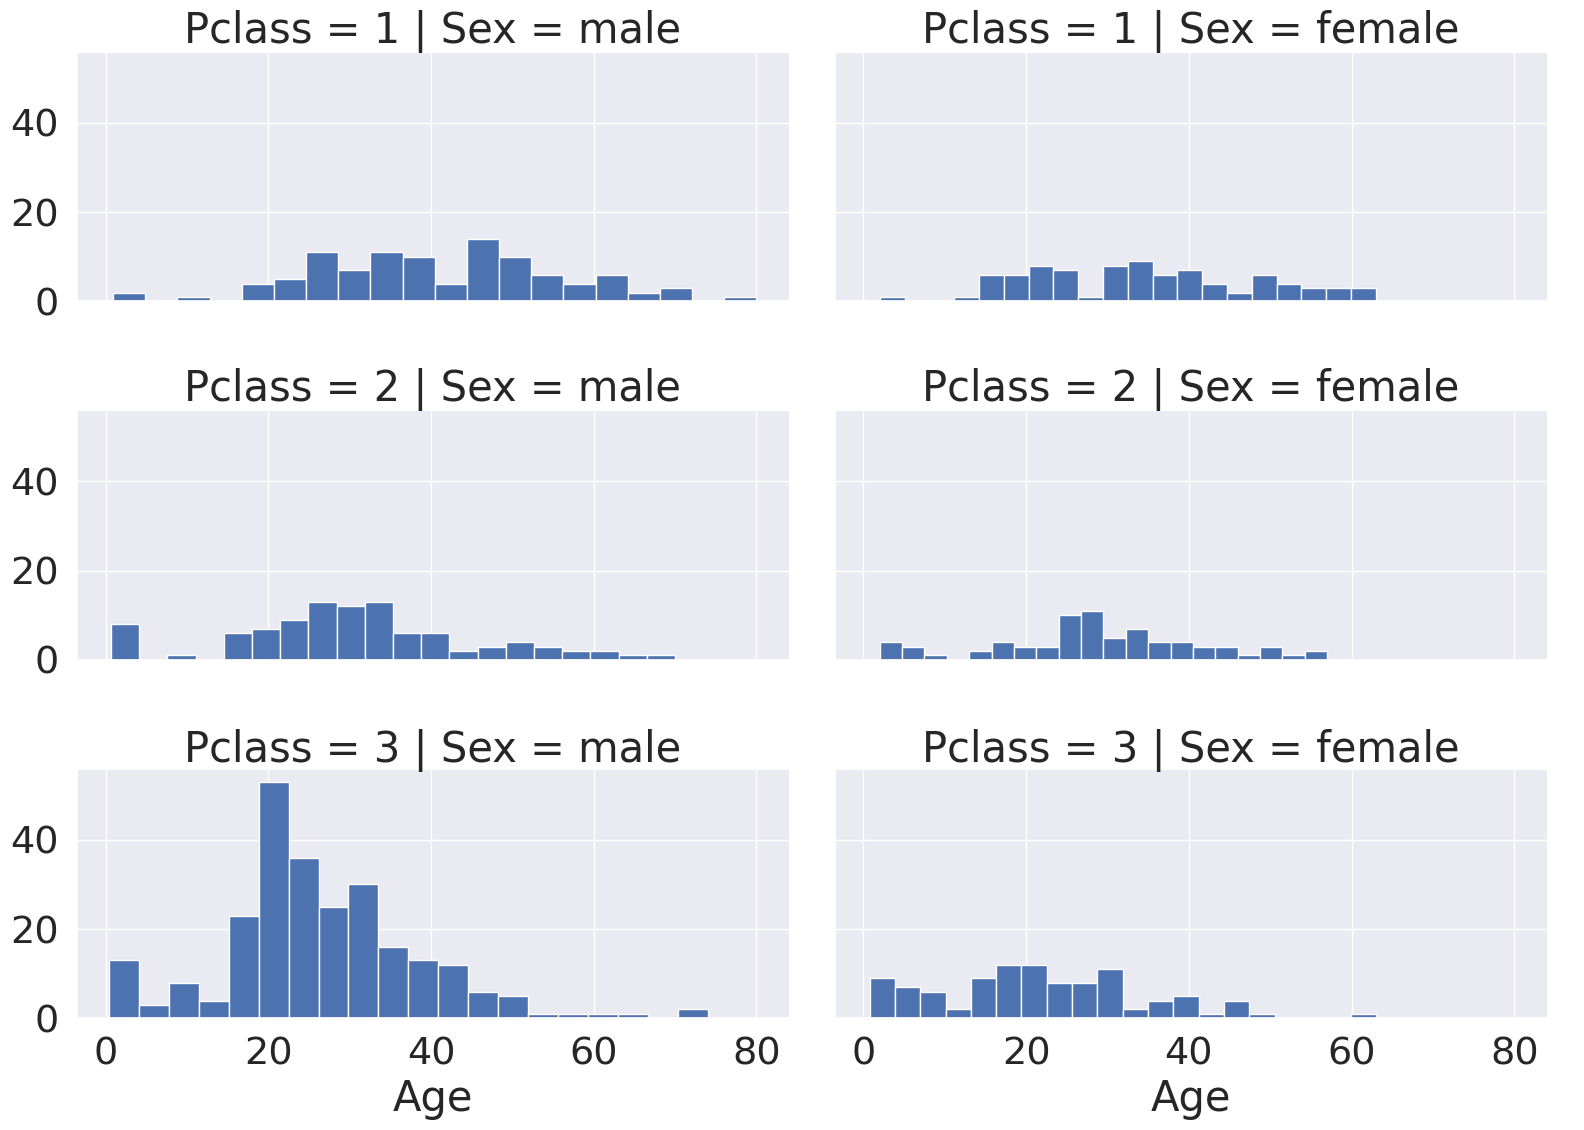

In [233]:
grid = sns.FacetGrid(df_train, row='Pclass', col='Sex', height=4, aspect=2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

#### 2.4. Age

In [234]:
min_age = df_train['Age'].min()
max_age = df_train['Age'].max()
mean_age = round(df_train['Age'].mean(), 2)
median_age = df_train['Age'].median()

print(f'Mean Age: {mean_age}')
print(f'Median Age: {median_age}')
print(f'Range: {min_age} - {max_age}')

Mean Age: 29.7
Median Age: 28.0
Range: 0.42 - 80.0


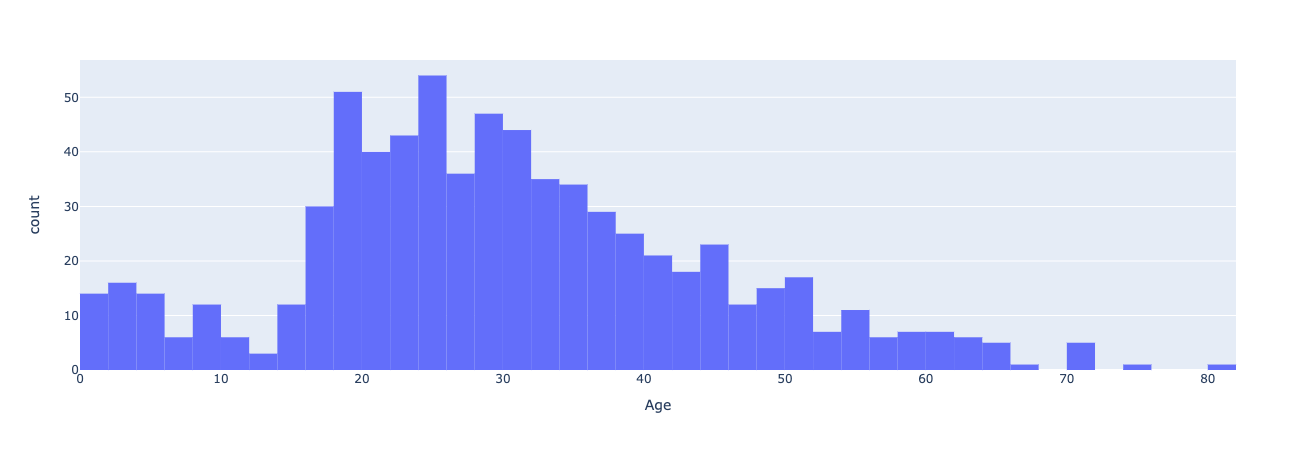

In [235]:
age_hist = px.histogram(df_train, x='Age')
age_hist.show()

Let's examine the survivors for each class distributed by age.

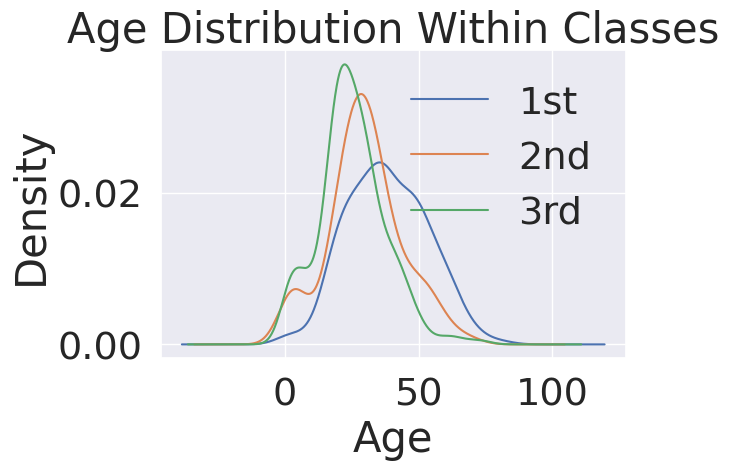

In [236]:
# Age distribution within classes
plt.figure(figsize=(6,4))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution Within Classes')
plt.legend(['1st', '2nd', '3rd']);


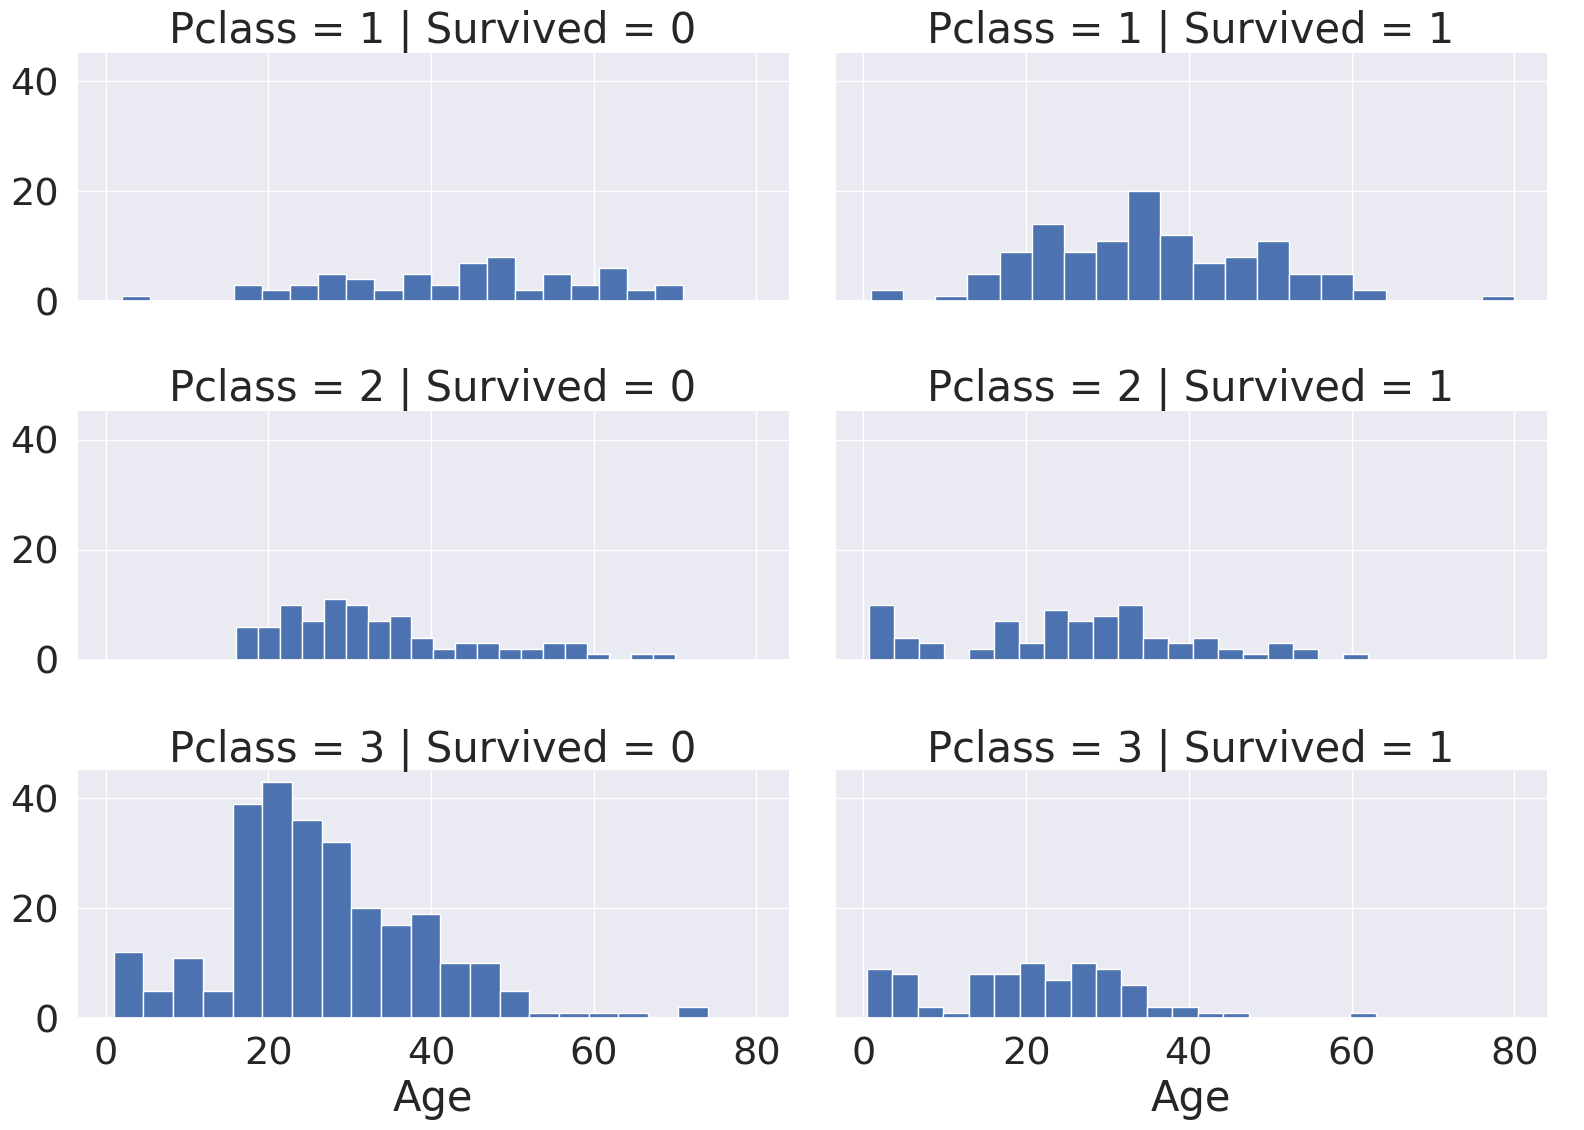

In [237]:
class_age_surv_hist = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=4, aspect=2)
class_age_surv_hist.map(plt.hist, 'Age', bins=20)
class_age_surv_hist.add_legend();

Let's try using a cummulative ratio to see the effect of age on survival rates.

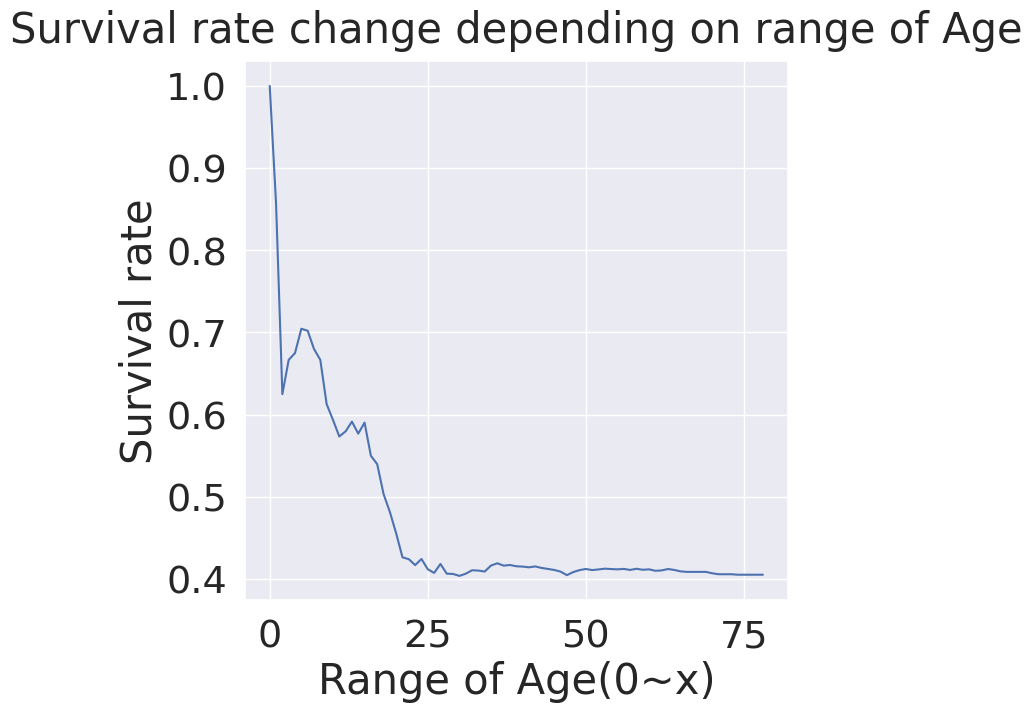

In [238]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

#### 2.5. Pclass, Sex, Age

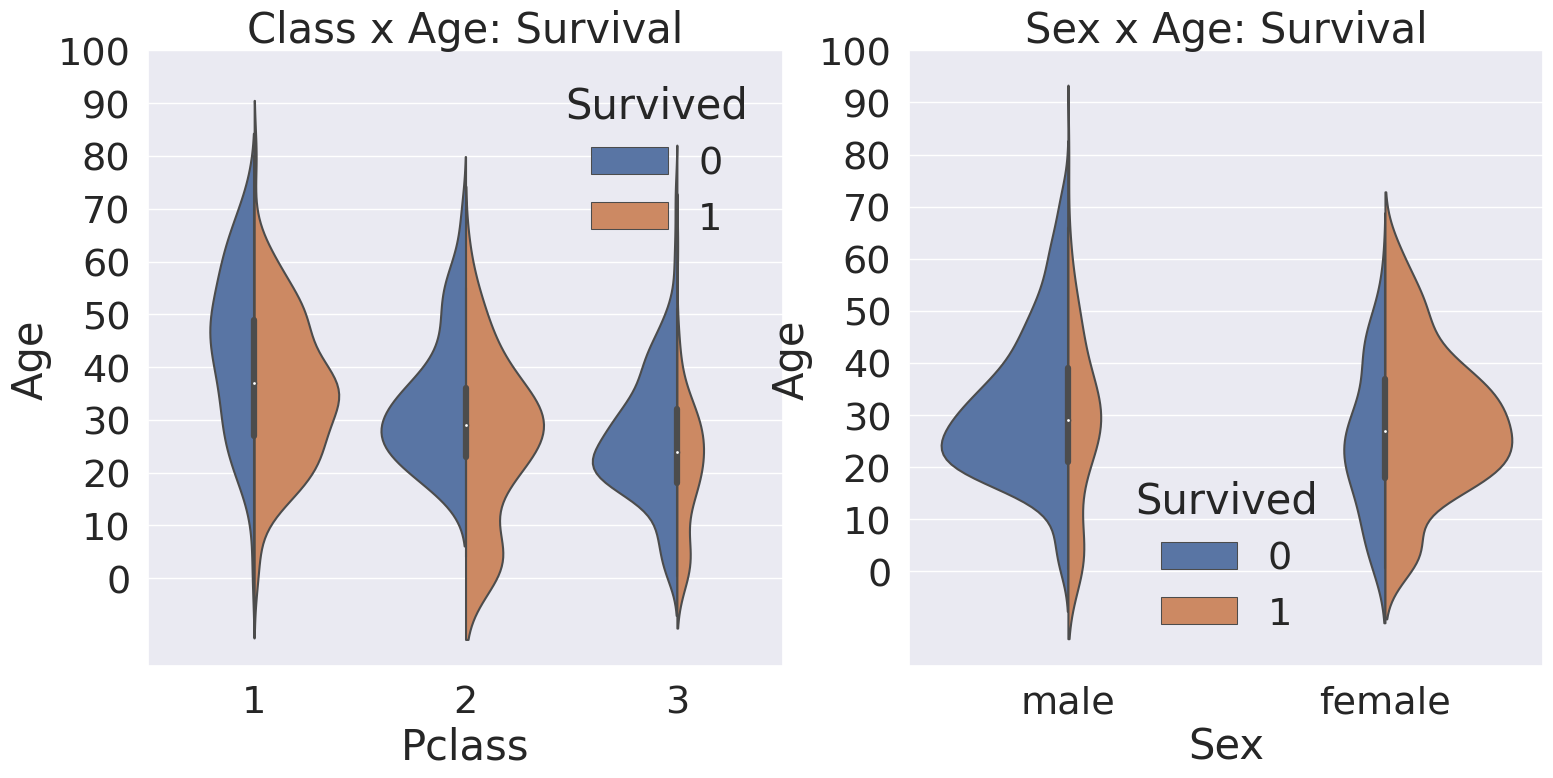

In [239]:
f, axs = plt.subplots(1, 2, figsize=(18,8))

# age distribution: class x survival
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', scale='count', split=True, ax=axs[0])
axs[0].set_title('Class x Age: Survival')
axs[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', scale='count', split=True, ax=axs[1])
axs[1].set_title('Sex x Age: Survival')
axs[1].set_yticks(range(0, 110, 10))

plt.show()


Interim summary:
- Higher class: more likely to survive
- Female: more likely to survive
- Younger: more likely to survive

#### 2.6. Embarked

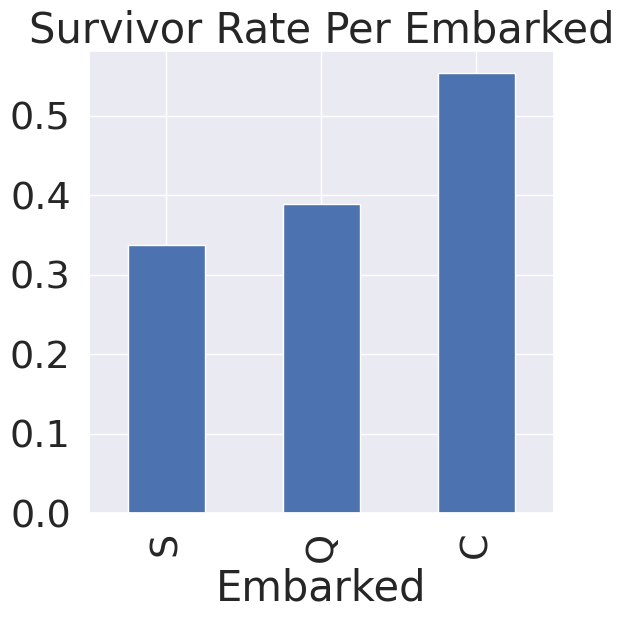

In [240]:
f, ax = plt.subplots(1, 1, figsize=(6,6))
df_train[['Embarked', 'Survived']].groupby('Embarked', as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar(ax=ax);
ax.legend(labels=[]);
ax.set_title('Survivor Rate Per Embarked');


Why the difference in survivor rate between embarked ports?
Let's try examining its relationship with other variables:
- No. of passengers per embarked
- Embarked x Survived
- Embarked x Sex
- Embarked x Pclass

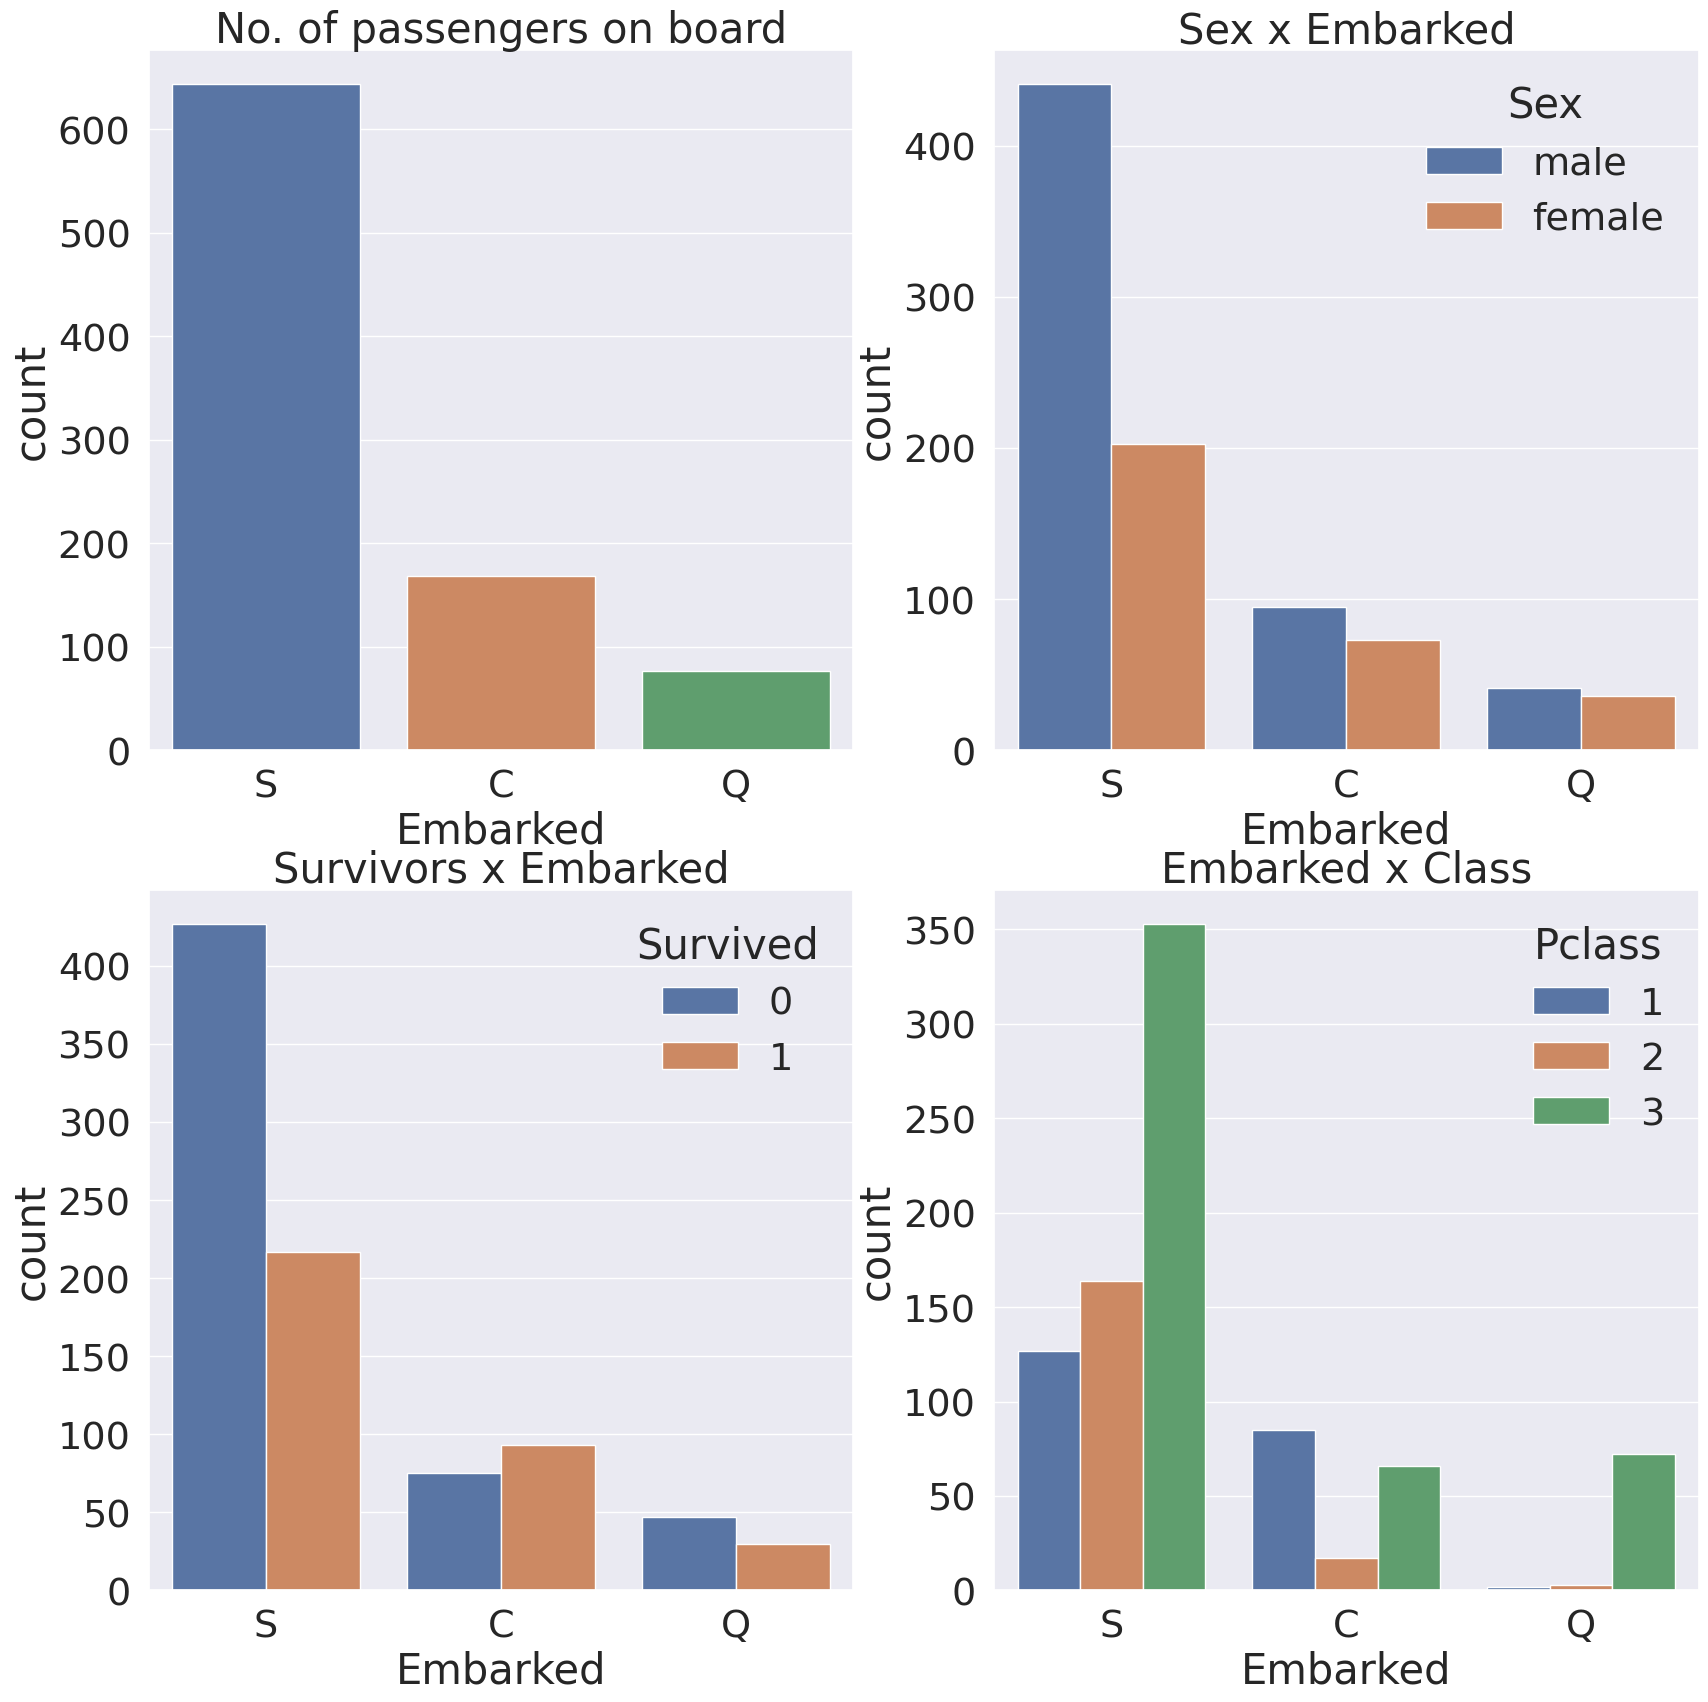

In [241]:
f, ax = plt.subplots(2, 2, figsize=(20,20))

# plot 1
sns.countplot(data=df_train, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('No. of passengers on board')

# plot 2
sns.countplot(data=df_train, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Sex x Embarked')

# plot 3
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Survivors x Embarked')

# plot 4
sns.countplot(data=df_train, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked x Class');


Interim summary:
- Passengers embarked: S > C > Q
- Significantly more males embarked in port S
- Significantly more passengers who embarked in port S did not survive.
- Significantly more 3rd class passengers embarked in port S.

Therefore, it seems the difference in survival rate as a function of Embarked is related to passenger **count, sex, and class**.

#### 2.7. Family - SibSp + Parch

In [242]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # Include self (+1)
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # Include self (+1)


In [243]:
min_fam_size = df_train['FamilySize'].min()
max_fam_size = df_train['FamilySize'].max()
mean_fam_size = round(df_train['FamilySize'].mean(), 2)
median_fam_size = round(df_train['FamilySize'].median(), 2)

print(f'Min family size: {min_fam_size}')
print(f'Max family size: {max_fam_size}')
print(f'Mean family size: {mean_fam_size}')
print(f'Median family size: {median_fam_size}')

Min family size: 1
Max family size: 11
Mean family size: 1.9
Median family size: 1.0


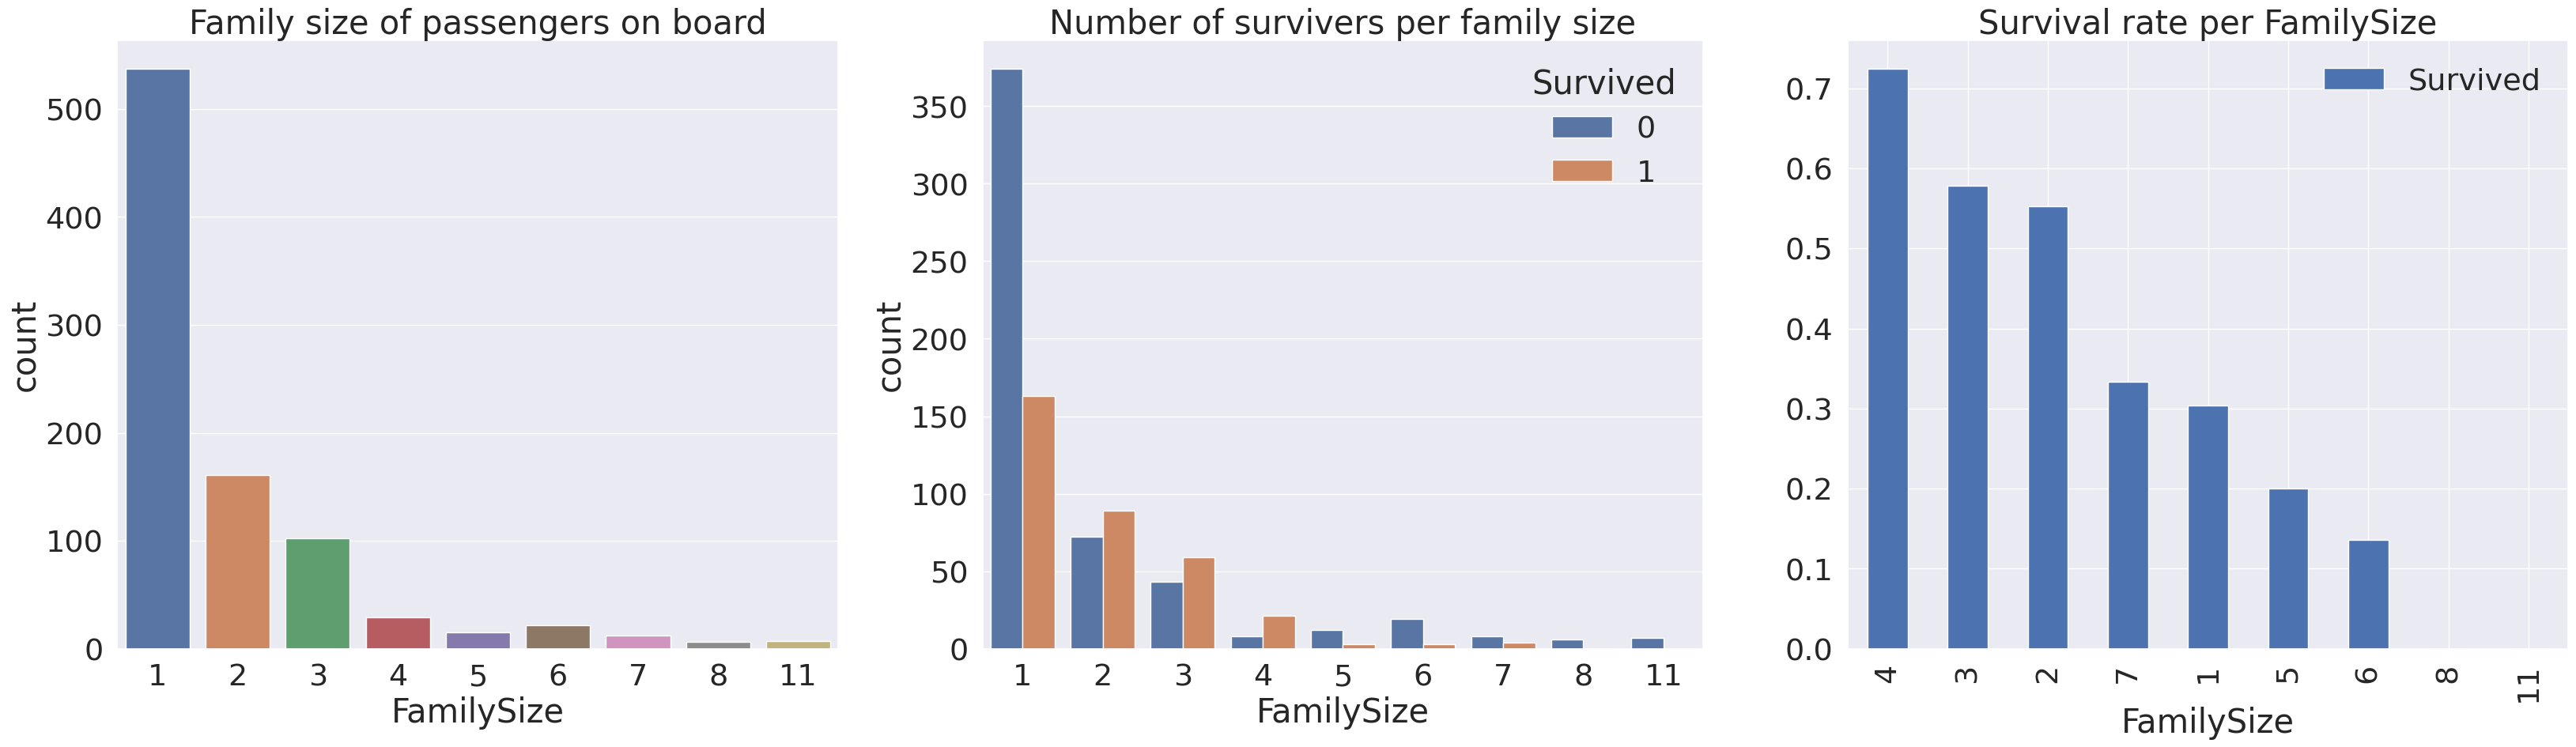

In [244]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

# plot 1
sns.countplot(data=df_train, x='FamilySize', ax=ax[0])
ax[0].set_title('Family size of passengers on board')

# plot 2
sns.countplot(data=df_train, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('Number of survivers per family size')

# plot 3
df_train[['FamilySize', 'Survived']].groupby('FamilySize', as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survival rate per FamilySize');

Interim summary:
- most passengers were alone (FamilySize=1)
- More chance of survival in 4, 3, 2 sized families.
- Too much, or too little family members did not help survival.

#### 2.8. Fare

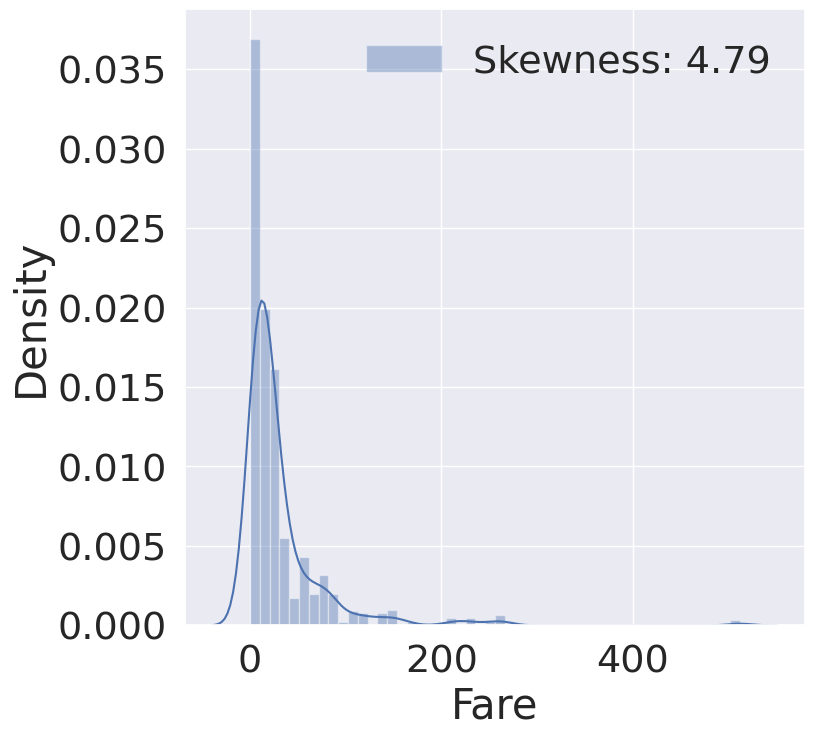

In [245]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- The distribution of Fare is too positively skewed. 
- It would be better to log transform Fare data to get a more normally distributed data.


In [246]:
# replace null with mean in TEST set.
df_test.loc[df_test.Fare.isnull()] = df_test['Fare'].mean()

In [247]:
# perform log transformation
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

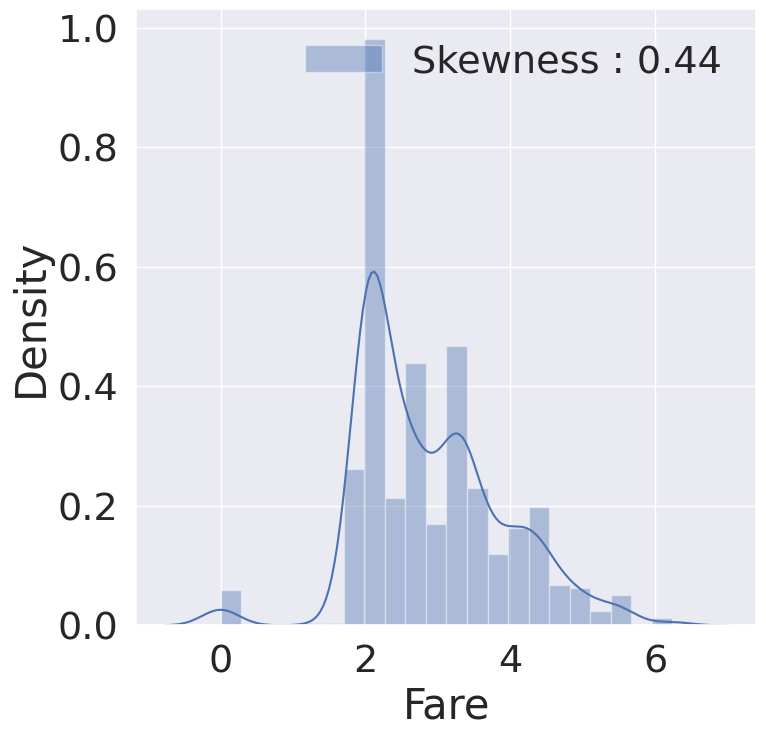

In [248]:
# draw new graph
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### 2.9. Cabin
- This column has too many missing values (77.1%), so we will not include this in the modeling.

#### 3.1. Feature Engineering

##### 3.1.1. Fill Null in Age using Title

In [249]:
# extract salutation from name
df_train['Salutation'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Salutation'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [250]:
pd.crosstab(df_train['Salutation'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Salutation,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Male: 

In [251]:
replace_salut_dict = {
    'Mlle': 'Miss',
    'Mme': 'Miss',
    'Ms': 'Miss',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Lady': 'Mrs',
    'Countess': 'Mrs',
    'Jonkheer': 'Other',
    'Col': 'Other',
    'Rev': 'Other',
    'Capt': 'Other',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Dona': 'Mr'
}

df_train['Salutation'].replace(replace_salut_dict, inplace=True)
df_test['Salutation'].replace(replace_salut_dict, inplace=True)

In [252]:
df_train['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [253]:
df_train[['Salutation', 'Survived', 'PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].groupby('Salutation').mean()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Salutation,,,,,,,,
Master,0.575000,414.975000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,0.704301,411.741935,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,0.162879,455.331439,2.384470,32.648284,0.291667,0.149621,2.648455,1.441288
Mrs,0.795276,456.393701,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,0.100000,582.600000,1.600000,48.300000,0.200000,0.200000,2.803713,1.400000


In [254]:
df_train[df_train['Salutation'] == 'Mr'].Age.mean()

32.64828431372549

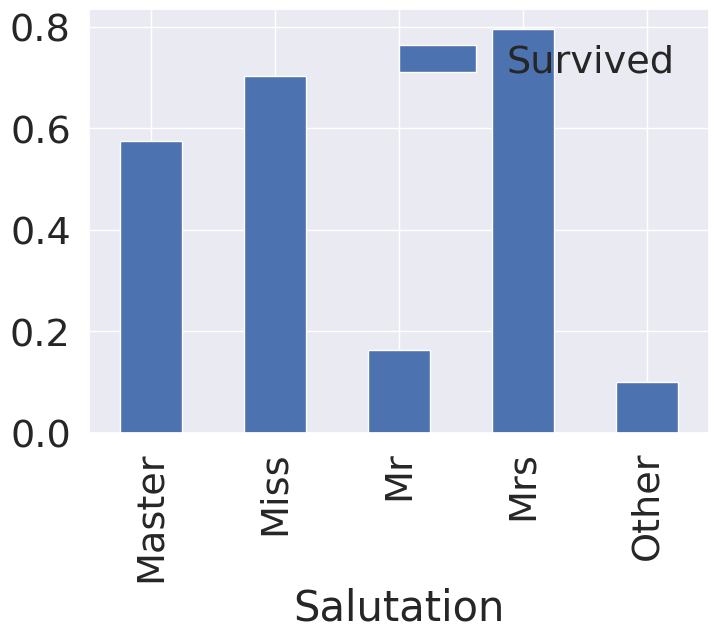

In [255]:
df_train[['Salutation', 'Survived']].groupby('Salutation').mean().plot.bar();

In [256]:
mean_age_by_salutation = df_train.groupby('Salutation')['Age'].mean()

# Use the mean ages to fill missing values in both train and test DataFrames
df_train.loc[df_train['Age'].isnull(), 'Age'] = df_train['Salutation'].map(mean_age_by_salutation)
df_test.loc[df_test['Age'].isnull(), 'Age'] = df_test['Salutation'].map(mean_age_by_salutation)

In [257]:
df_train.loc[(df_train.Age.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Salutation


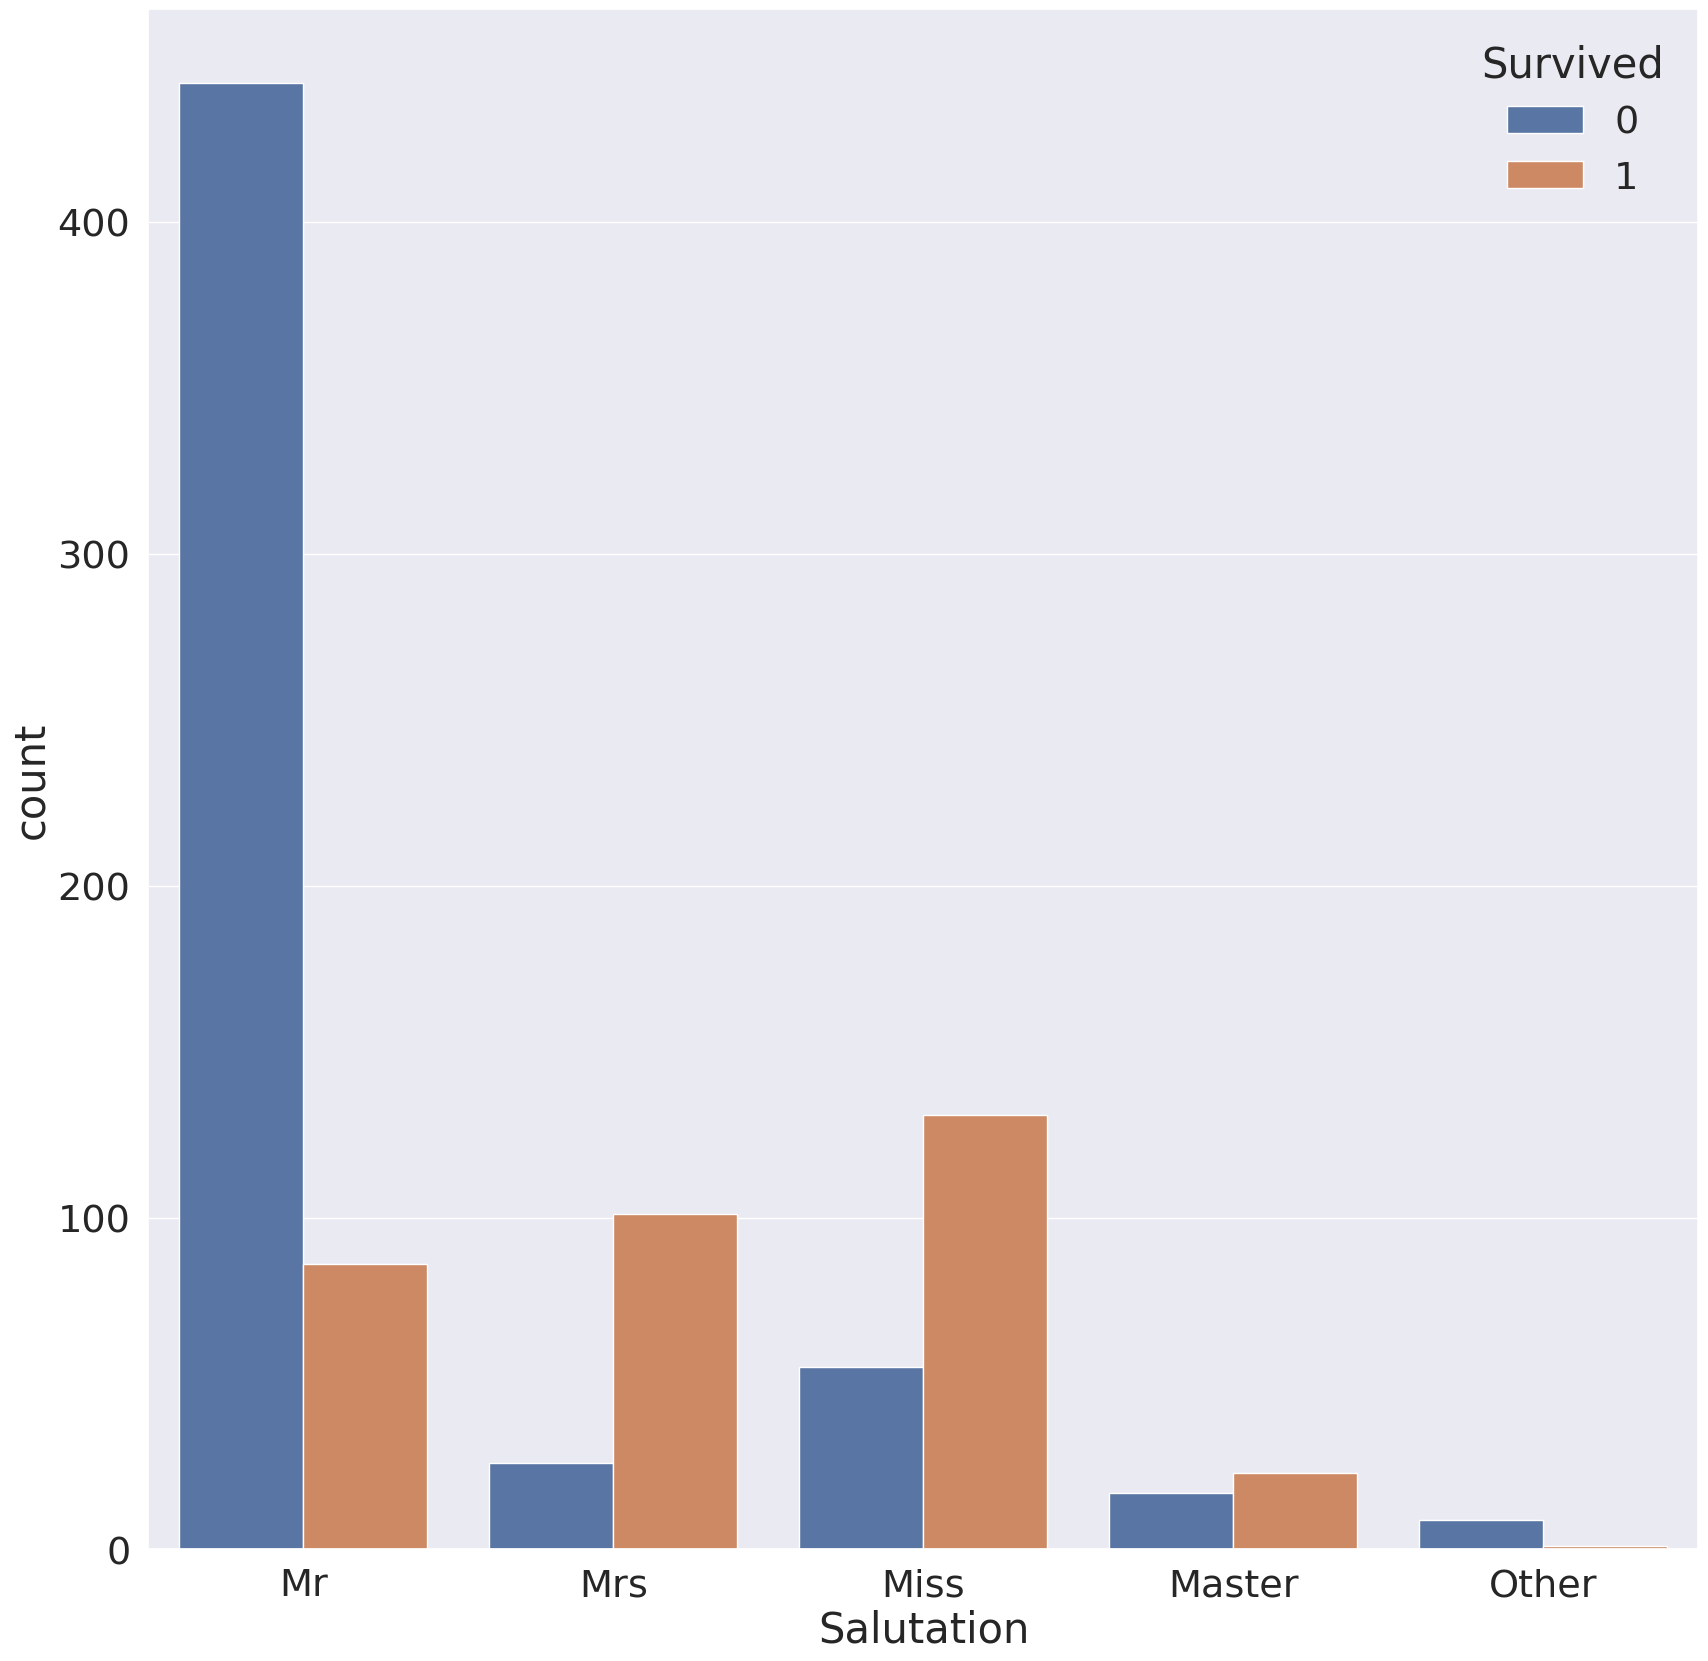

In [258]:
# plot 2
f, ax = plt.subplots(1, 1, figsize=(20,20))
sns.countplot(data=df_train, x='Salutation', hue='Survived', ax=ax);

##### 3.1.2. Fill Null in Embarked

In [259]:
df_train['Embarked'].isnull().sum()   # how many missing values in 'Embarked'

2

In 2.6, we saw that port S had the most embarked passengers. For convenience, we will fill in the null values as 'S'.

In [260]:
df_train['Embarked'].fillna('S', inplace=True)

In [261]:
df_test['Embarked'].fillna('S', inplace=True)

##### 3.2. Change string values to numerical
- Currently, variables 'Sex', 'Embarked', and 'Salutation' all contain strings as values.
- When entering variables into our model, the values should be numerical.
- Let's convert data using the map() method.

In [262]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Salutation   891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [263]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Pclass       418 non-null    float64
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    float64
 6   Parch        418 non-null    float64
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        92 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    float64
 12  Salutation   417 non-null    object 
dtypes: float64(7), object(6)
memory usage: 42.6+ KB


In [264]:
# map 'Salutation' to numeric
df_train['Salutation'] = df_train['Salutation'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Salutation'] = df_test['Salutation'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [265]:
df_train.Salutation.unique()

array([2, 3, 1, 0, 4])

In [266]:
# map 'Embarked' to numeric
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [267]:
df_train.Embarked.unique()

array([2, 0, 1])

In [268]:
# map 'Sex' to numeric
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [269]:
df_train.Sex.unique()

array([1, 0])

##### 3.3 Correlation between variables
- Before moving on to modeling, let's draw out the correlations between our key variables.
- Since we have multiple variables, it is ideal to use a heatmap to visualize the correlations.

<Axes: title={'center': 'Pearson Correlation of Features'}>

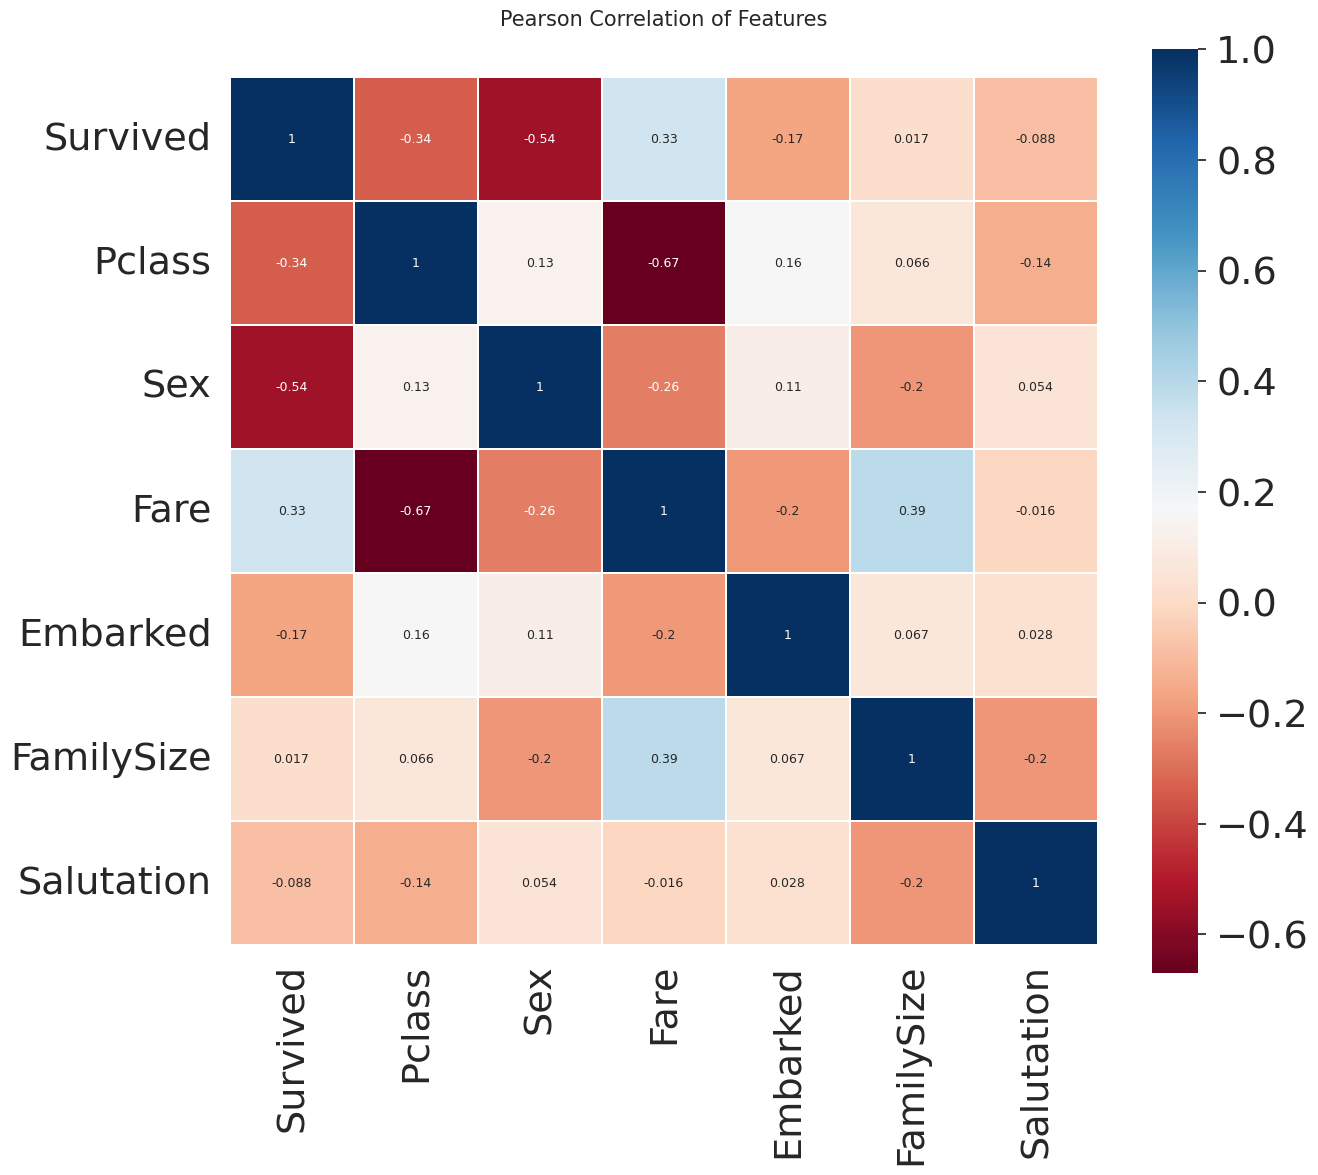

In [271]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Salutation']] # filter just the variables of interest

# plot heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 9})



In relation to 'Survived', 'Pclass' and 'Sex' seem to be the strongest variables independently. Altough 'Fare' shows a modest correlation (r=0.33), 'Fare' also shares a strong correlation with 'Pclass' (r=-0.67). We should take this into consideration when modeling our data, since it may lead to multicolinearity issues. For practice purposes however, we will include it in our model anyway.

##### 3.4 One-hot encoding on categorical variables
- When dealing with categorical data, often times they are converted in a binary matrix for better performance and interpretability.
- In pandas, we can use the get_dummies() method.

In [272]:
df_train = pd.get_dummies(data=df_train, prefix='Salut', columns=['Salutation'])
df_test = pd.get_dummies(data=df_test, prefix='Salut', columns=['Salutation'])

In [273]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
 13  Salut_0      891 non-null    bool   
 14  Salut_1      891 non-null    bool   
 15  Salut_2      891 non-null    bool   
 16  Salut_3      891 non-null    bool   
 17  Salut_4      891 non-null    bool   
dtypes: bool(5), float64(2), int64(8), object(3)
memory

Notice that the original 'Salutation' column has disappeared, and instead 5 new columns (Salut_0 ~ Salut_4). This is because the original column had five unique categorical values. For each column, True (=1) and False (=0) represent the presence and absence of a value in each column, respectively.

In the same respect, the dummy variables for 'Embarked' will have three new columns replace the original.

In [274]:
df_train = pd.get_dummies(data=df_train, prefix='Embarked', columns=['Embarked'])
df_test = pd.get_dummies(data=df_test, prefix='Embarked', columns=['Embarked'])

In [275]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  Salut_0      891 non-null    bool   
 13  Salut_1      891 non-null    bool   
 14  Salut_2      891 non-null    bool   
 15  Salut_3      891 non-null    bool   
 16  Salut_4      891 non-null    bool   
 17  Embarked_0   891 non-null    bool   
 18  Embarked_1   891 non-null    bool   
 19  Embarked

In [276]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Salut_0,Salut_1,Salut_2,Salut_3,Salut_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,2,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,1,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,1,False,False,True,False,False,False,False,True


In [277]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Salut_0.0,Salut_1.0,Salut_2.0,Salut_3.0,Salut_4.0,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,892.0,3.0,"Kelly, Mr. James",1.0,34.5,0.0,0.0,330911,2.057860,NaN,1.0,False,False,True,False,False,False,True,False
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.0,1.0,0.0,363272,1.945910,NaN,2.0,False,False,False,True,False,False,False,True
2,894.0,2.0,"Myles, Mr. Thomas Francis",1.0,62.0,0.0,0.0,240276,2.270836,NaN,1.0,False,False,True,False,False,False,True,False
3,895.0,3.0,"Wirz, Mr. Albert",1.0,27.0,0.0,0.0,315154,2.159003,NaN,1.0,False,False,True,False,False,False,False,True
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.0,1.0,1.0,3101298,2.508582,NaN,3.0,False,False,False,True,False,False,False,True


One thing to note is if you have too many unique categories for a variable, one-hot encoding may cause a high dimensionality problem. In such a case you may have to conduct additional dimensionality reductions to optimize the model.

##### 3.5. Remove redundant columns

In [278]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [279]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
 6   Salut_0     891 non-null    bool   
 7   Salut_1     891 non-null    bool   
 8   Salut_2     891 non-null    bool   
 9   Salut_3     891 non-null    bool   
 10  Salut_4     891 non-null    bool   
 11  Embarked_0  891 non-null    bool   
 12  Embarked_1  891 non-null    bool   
 13  Embarked_2  891 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 48.9 KB


In [280]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    float64
 1   Sex           417 non-null    float64
 2   Age           418 non-null    float64
 3   Fare          418 non-null    float64
 4   FamilySize    418 non-null    float64
 5   Salut_0.0     418 non-null    bool   
 6   Salut_1.0     418 non-null    bool   
 7   Salut_2.0     418 non-null    bool   
 8   Salut_3.0     418 non-null    bool   
 9   Salut_4.0     418 non-null    bool   
 10  Embarked_0.0  418 non-null    bool   
 11  Embarked_1.0  418 non-null    bool   
 12  Embarked_2.0  418 non-null    bool   
dtypes: bool(8), float64(5)
memory usage: 19.7 KB


#### 4. Implement machine learning algorithm for binary classification (Random Forest Classifier)

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics   # for model evaluation
from sklearn.model_selection import train_test_split  # used for dividing training/test sets

##### 4.1. Prep - split dataset
- From the training data, let's split the 'Survived' column as target values.
- Also, from the training data, we will split a validation set.

In [282]:
X_train = df_train.drop('Survived', axis=1).values   # our input values
target_label = df_train.Survived.values   # target values (1 vs 0)
X_test = df_test.values   # test set

In [283]:
# split train and test 
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

##### 4.2. Model generation and prediction

In [284]:
model = RandomForestClassifier()   # make model
model.fit(X_tr, y_tr)   # fit model
prediction = model.predict(X_vld)   # predict validation set

In [285]:
size_vld = y_vld.shape[0]  # validation data count
size_vld

268

In [286]:
accuracy = metrics.accuracy_score(prediction, y_vld)  # accuracy score
accuracy

0.8395522388059702

In [287]:
size_vld * accuracy   # how many instances were accurate?

225.0

##### 4.3. Feature importance (coefficient)

In [288]:
feature_importances = model.feature_importances_
feat_imp_series = Series(feature_importances, index=df_test.columns)
feat_imp_series

Pclass          0.088334
Sex             0.098201
Age             0.252463
Fare            0.250846
FamilySize      0.081105
Salut_0.0       0.009492
Salut_1.0       0.041688
Salut_2.0       0.105785
Salut_3.0       0.029727
Salut_4.0       0.004576
Embarked_0.0    0.011380
Embarked_1.0    0.011043
Embarked_2.0    0.015360
dtype: float64

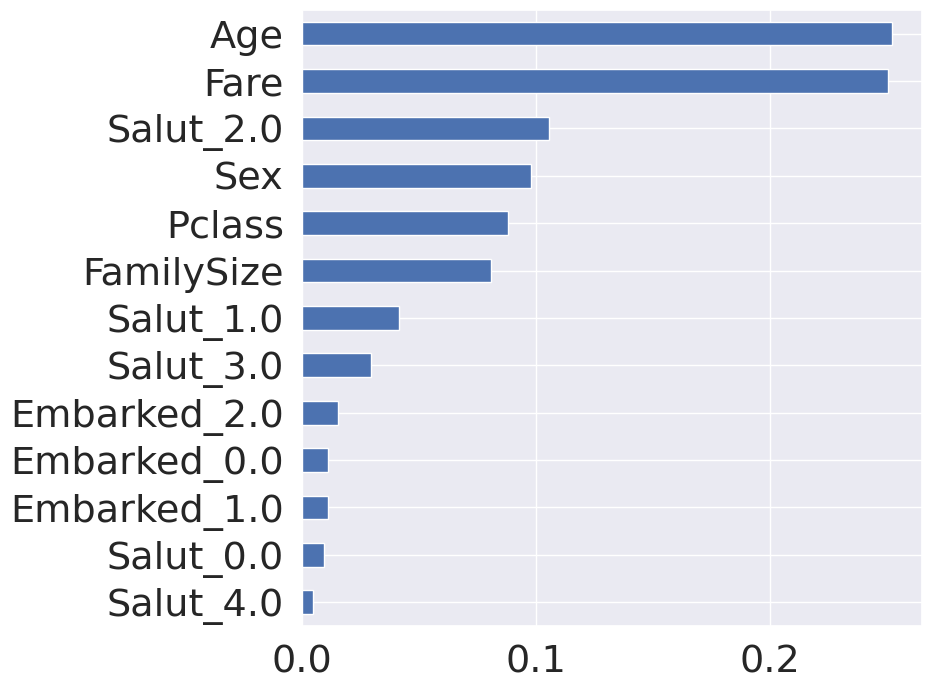

In [289]:
plt.figure(figsize=(8,8))
feat_imp_series.sort_values(ascending=True).plot.barh();

##### 4.4. Prediction on test set

In [290]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [291]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
 6   Salut_0     891 non-null    bool   
 7   Salut_1     891 non-null    bool   
 8   Salut_2     891 non-null    bool   
 9   Salut_3     891 non-null    bool   
 10  Salut_4     891 non-null    bool   
 11  Embarked_0  891 non-null    bool   
 12  Embarked_1  891 non-null    bool   
 13  Embarked_2  891 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 48.9 KB


In [292]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    float64
 1   Sex           417 non-null    float64
 2   Age           418 non-null    float64
 3   Fare          418 non-null    float64
 4   FamilySize    418 non-null    float64
 5   Salut_0.0     418 non-null    bool   
 6   Salut_1.0     418 non-null    bool   
 7   Salut_2.0     418 non-null    bool   
 8   Salut_3.0     418 non-null    bool   
 9   Salut_4.0     418 non-null    bool   
 10  Embarked_0.0  418 non-null    bool   
 11  Embarked_1.0  418 non-null    bool   
 12  Embarked_2.0  418 non-null    bool   
dtypes: bool(8), float64(5)
memory usage: 19.7 KB


In [293]:
# impute missing value in X_test

from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='most_frequent')  # You can choose a different strategy, like 'median' or 'most_frequent'

# Fit and transform X_test
X_test_imputed = imputer.fit_transform(X_test)


In [294]:
# Make predictions on X_test_imputed
prediction_on_test = model.predict(X_test_imputed)
submission['Survived'] = prediction_on_test

In [295]:
submission.to_csv('./submission_sdc.csv', index=False)

In [ ]:
np.isnan(X_test)

In [296]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
